In [13]:
# ============================================
# 1️⃣ IMPORT LIBRARY
# ============================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [14]:
# ============================================
# 2️⃣ LOAD DATA
# ============================================
df = pd.read_csv("air_dataset.csv")  # ganti ke path CSV kamu
df = df.dropna(subset=['AQI'])

In [15]:
# ============================================
# 3️⃣ PILIH FITUR (X) DAN TARGET (y)
# ============================================
# Hindari kolom yang dipakai dalam perhitungan AQI (CO(GT), NO2(GT), PT08.S5(O3))
features = [
    'CO(GT)', 'NO2(GT)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
]

# Pastikan semua fitur ada di dataframe
df = df.dropna(subset=features)

X = df[features]
y = df['AQI']



In [16]:
# ============================================
# 4️⃣ TRAIN-TEST SPLIT
# ============================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# ============================================
# 5️⃣ NORMALISASI
# ============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:

# ============================================
# 6️⃣ TRAIN MODEL
# ============================================
model = RandomForestRegressor(
    n_estimators=200,       # jumlah pohon
    max_depth=10,           # batasi kedalaman biar gak overfit
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [19]:
# ============================================
# 7️⃣ EVALUASI MODEL
# ============================================
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Model Evaluation ===")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


=== Model Evaluation ===
R² Score: 0.9998
RMSE: 0.9033


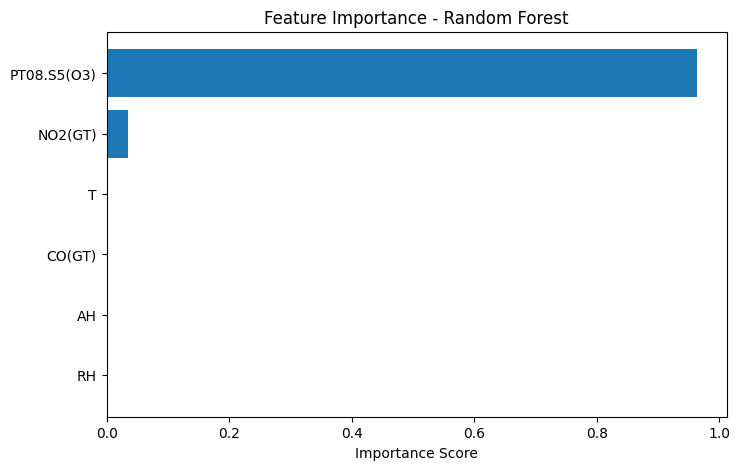

In [20]:
# ============================================
# 8️⃣ FEATURE IMPORTANCE
# ============================================
importance = model.feature_importances_
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.show()

In [21]:
# ============================================
# 9️⃣ CONTOH PREDIKSI
# ============================================
sample = X_test.iloc[:5]
preds = model.predict(scaler.transform(sample))

result = pd.DataFrame({
    'Actual_AQI': y_test.iloc[:5].values,
    'Predicted_AQI': preds
})
print("\nSample Predictions:")
print(result)


Sample Predictions:
   Actual_AQI  Predicted_AQI
0  107.769923     107.814805
1  224.114517     224.076186
2   58.456522      58.696230
3  151.020836     151.072545
4  201.217368     201.156947


In [ ]:
import pickle
with open('air_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('scaler_air.pkl', 'wb') as f:
    pickle.dump(scaler, f)